<a href="https://colab.research.google.com/github/bgalerne/IoT_data_science/blob/main/1_iot_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to image processing

In this first notebook we will work on image data, image visualization, and generating noisy images.

First let us discuss python libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import skimage
import imageio

Downlaod some image files:

In [ ]:
!wget "https://www.idpoisson.fr/galerne/iot_data_science/parrot.bmp"

--2020-12-20 18:51:53--  https://www.idpoisson.fr/galerne/iot_data_science/parrot.bmp
Resolving www.idpoisson.fr (www.idpoisson.fr)... 134.206.83.41
Connecting to www.idpoisson.fr (www.idpoisson.fr)|134.206.83.41|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 736614 (719K) [image/x-ms-bmp]
Saving to: ‘parrot.bmp’

parrot.bmp          100%[===================>] 719.35K  1022KB/s    in 0.7s    

2020-12-20 18:51:55 (1022 KB/s) - ‘parrot.bmp’ saved [736614/736614]



In [ ]:
u = imageio.imread('parrot.bmp')
print(u.shape)
print(u.dtype)
# u is an RGB  image (3 chanels), each having size 495 x 495.
# store this values (to adapt to other images)
M, N, nc = u.shape
# M is the height, N is the width (matrix convention)


#Image visualization:

In [ ]:
plt.imshow(u);

# Type of data: int8 VS float
uint8 type = integers between 0 and 255. 
This is the 8-bits representation for pixel gray-level, but it is not possible to do computation with this:

In [ ]:
x = np.array([250,30]).astype('uint8')
print(x)
print(x.dtype)
s = x[0]+x[1]
d = x[1]-x[0]
m1 = (x[0]+x[1])/2
m2 = x[0]/2 + x[1]/2
print(s, d, m1, m2)

Conclusion: **No processing with uint8 type**

Always convert do float or double precision before any operation. 
Only use uint8 before writing image file on disk.


In [ ]:
u = imageio.imread('parrot.bmp')
print(u.shape)
print(u.dtype)

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
axes[0].imshow(u)
axes[1].imshow(u.astype('float64'))
axes[2].imshow(u.astype('float64')/255)


**Warning:**

*   For RGB images with double precision imshow assumes the convention of RGB colors in the cube $[0,1]^3$
*   For RGB images in uint8 imshow assumes colors in the cube $[0,255]^3$

The proper conversion is done by the function ```skimage.img_as_float```


In [ ]:
u = skimage.img_as_float(imageio.imread('parrot.bmp'))
print(u.dtype)
print(np.min(u),np.max(u))
plt.imshow(u);

#RGB chanels:


In [ ]:
u = skimage.img_as_float(imageio.imread('parrot.bmp'))
r = u[:,:,0]
print(r.shape)
g = u[:,:,1]
b = u[:,:,2]

fig, axes = plt.subplots(nrows = 2, ncols=2, figsize=(10, 10))
ax = axes.ravel()
ax[0].imshow(u) 
ax[1].imshow(r, cmap=plt.cm.gray)
ax[1].set_title('red')
ax[2].imshow(g, cmap=plt.cm.gray)
ax[2].set_title('green')
ax[3].imshow(b, cmap=plt.cm.gray)
ax[3].set_title('blue');



###Exercise: 

Create the 3 RGB images rRGB, gRGB, bRGB that have the original r, g, b channels of u and the 2 other channels equal to zero.

Plot the 4 (u, rRGB, gRGB, bRGB) images as above.




In [ ]:
# TODO

#Convert an RGB image to a gray-level image

The value of each grayscale pixel is calculated as the weighted sum of the corresponding red, green and blue pixels as:

Y = 0.2125 R + 0.7154 G + 0.0721 B

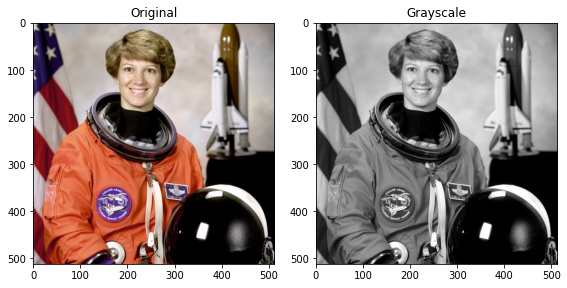

In [ ]:

original = skimage.data.astronaut()
grayscale = skimage.color.rgb2gray(original)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()



###Exercise:


1.   Do the same conversion with the parrot image.
2.   Compute the grayscale verison by a direct computation of Y = 0.2125 R + 0.7154 G + 0.0721 B and check that the two results are the same.



In [ ]:
#TODO

#True contrast for image visualization:

By default, imshow use a maximal linear contrast to display gray-level images.
This means that the minimal gray-level is affected to black=0 and the maximal gray-level is affected to white=1.

In [ ]:
original = skimage.data.astronaut()
grayscale = skimage.color.rgb2gray(original)
darker = 0.6*grayscale

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(grayscale, cmap=plt.cm.gray)
ax[0].set_title("Grayscale")
ax[1].imshow(darker, cmap=plt.cm.gray)
ax[1].set_title("Darker grayscale?")

fig.tight_layout()
plt.show()

Here both images have exactly the same display but not the same gray-level values!

Let us add colorbars to see what happends.

In [ ]:
original = skimage.data.astronaut()
grayscale = skimage.color.rgb2gray(original)
darker = 0.6*grayscale

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
im0 = ax[0].imshow(grayscale, cmap=plt.cm.gray)
ax[0].set_title("Grayscale")
plt.colorbar(im0,ax=ax[0])
im1 = ax[1].imshow(darker, cmap=plt.cm.gray)
ax[1].set_title("Darker grayscale?")
plt.colorbar(im1,ax=ax[1])

fig.tight_layout()
plt.show()

The advantage of this is to be able to visualize images whatever their range, eg a noise image with negative value and small variance:

In [ ]:
plt.imshow(np.random.randn(50,70))
plt.gray()
plt.colorbar()

However one often needs to look at "true" gray-levels to compare images. This is done by precising that the the min gray-level is 0 and the max gray-level is 1.

In [ ]:
original = skimage.data.astronaut()
grayscale = skimage.color.rgb2gray(original)
darker = 0.6*grayscale

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
im0 = ax[0].imshow(grayscale, cmap=plt.cm.gray)
im0.set_clim(0,1)
ax[0].set_title("Grayscale")
plt.colorbar(im0,ax=ax[0])
im1 = ax[1].imshow(darker, cmap=plt.cm.gray)
im1.set_clim(0,1)
ax[1].set_title("Darker grayscale?")
plt.colorbar(im1,ax=ax[1])

fig.tight_layout()
plt.show()

#Crop a subpart of an image

One can extract subpart of images using matrix extraction.

###Exercise:


1.   Extract a subimage that represent the head of the astronaut.
2.   Insert the head in color version within the image in grayscale version.
3. (More challenging, can be skipped) Same insertion but following a round region arround the head. Hint: Create the image of a disk and use Boolean selection.


In [ ]:
#TODO

#Noise

Let us add a Gaussian noise to a graylevel image.

In [ ]:
original = skimage.data.chelsea()
grayscale = skimage.color.rgb2gray(original)
M, N = grayscale.shape

sigma = 0.15
#noisy = skimage.util.random_noise(grayscale, var=sigma**2)
noisy = grayscale + sigma*np.random.randn(M,N)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

im0 = ax[0].imshow(grayscale, cmap=plt.cm.gray)
ax[0].set_title("Grayscale")
im0.set_clim(0,1)
plt.colorbar(im0,ax=ax[0])
im1 = ax[1].imshow(noisy, cmap=plt.cm.gray)
ax[1].set_title("Noisy")
im1.set_clim(0,1)
plt.colorbar(im1,ax=ax[1])


fig.tight_layout()
plt.show()



###Exercise:
Use the function ```skimage.util.random_noise()``` to add:

*   additive Gaussian noise with sigma = 0.2
*   Poisson noise:
Given on image $u$ in with graylevels in $[0,1]$ and an integer $N$, generate the image:
$$
n_u(i,j) = P(i,j)/N ~\text{where}~ P(i,j)\sim \mathcal{P}(N u(i,j)). 
$$
Use the function ```np.random.poisson```.
What is the mean and variance of $n_u(i,j)$?
*   Salt & pepper noise with 10% of occurency: Each pixel is either randomly black or white with a probability of 10%.
Do it from **scratch** or use ```skimage.util.random_noise```

Present the original and the three noisy images in a single figure.

Note that to use the poisson noise from ```skimage.util.random_noise``` requires to quantize the image first.


In [ ]:
#TODO.

# Image Quantization

Image quantization consists in reducing the set of gray levels used to
represent the image.
This operation is useful for displaying an image _u_ on a screen that 
supports a smaller number of colors 
(this is needed with a standard screen if _u_ is coded on more than 8 bits per chanel).

Uniform quantization consists in dividing the set of 256 levels
$$ \{0,...,255\}/255 $$

into $K < 256$ regions.

###Exercise:

1. Define a function ```quantize_img(u,K)```that returns the quantization of $u$ into $K$ gray-levels using a rounding function.

2. For which value of _K_ do you start to see a difference with the original image ? 





In [ ]:
#TODO

# Dithering:
Dithering consists in adding intentionnally noise to an image before quantization, in order to perceptually hide the quantization effects.

###Exercise:
With a quantization of $K=10$, compare the quantized result of $u$ and $u$
corrupted with additional Gaussian white noise.

For which range of standard deviation do you think the result is more pleasant?


In [ ]:
#TODO

#Credits:
Some parts of this practical session are inspired by: Julie Delon's "Introduction to image processing - Radiometry": 
http://w3.mi.parisdescartes.fr/~jdelon/enseignement/tp_image/org/TP_radiometrie.html
